In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def cluster_data(df: pd.DataFrame, columns_to_remove=['userid_hash', 'account_type'] ,eps= 0.5, min_sample =5):
  X = df.drop(columns = columns_to_remove).values
  clustering = DBSCAN(eps=3, min_samples=2).fit(X)
  df['cluster'] = clustering.labels_
  return df

In [ ]:
def dimensionality_reduction(df: pd.DataFrame, columns_to_remove=['userid_hash', 'account_type'], dim_size = 2):
  X = df.drop(columns = columns_to_remove).values
  X_embedded = TSNE(n_components=dim_size, learning_rate='auto').fit_transform(X)
  for i in range(dim_size):
    df[f'tsne_{i+1}'] = X_embedded[:,i]
  return df

In [ ]:
def plot_scatter(df, x_col = 'tsne_1', y_col = 'tsne_2', hue = 'account_type'):
  plt.figure(figsize=(16,10))
  sns.scatterplot(
      x=x_col, y=y_col,
      hue=hue,
      palette=sns.color_palette("hls", len(df[hue].unique())),
      data=df,
      legend="full",
      alpha=0.3
  )

#dimensionality redusction

In [ ]:
import os
import numpy as np
import pandas as pd
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_data_dir = 'drive/MyDrive/master deg/NLP_And_Social_Dynamics/Data/preprocessed_data'
emb_df_name = 'node_embeddings.csv'
emb_df_path = os.path.join(path_to_data_dir, emb_df_name)
emb_df = pd.read_csv(emb_df_path, index_col=0)

In [ ]:
emb_df = dimensionality_reduction(emb_df, columns_to_remove=['user', 'tsne_1', 'tsne_2', 'label'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
emb_df

,user,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_55,emb_56,emb_57,emb_58,emb_59,emb_60,emb_61,emb_62,emb_63,emb_64
0,02fdbbce9f36a93ed8056e0a1b02a857a0bce32e7d96d0...,1.459145,0.521306,2.038367,0.145221,-1.021477,-0.739465,0.734467,-0.808959,-0.325866,...,0.352702,-1.214321,-0.166637,-0.696916,0.535568,0.733094,1.146484,-2.051864,1.111681,-1.642789
1,3177941678,0.756345,0.580566,1.297556,0.803042,-1.068037,0.528321,0.695927,-1.318989,-0.982950,...,-0.422194,-1.360947,-0.222614,-1.015623,-0.080794,1.364994,0.597030,-1.228449,0.431284,-0.601299
2,330564612,0.554813,0.497018,1.012360,0.692524,-0.810237,0.426484,0.493860,-1.019578,-0.753218,...,-0.342200,-1.130668,-0.165342,-0.797173,-0.067647,1.113815,0.419038,-0.947977,0.317729,-0.451417
3,0994abf9fb8fe1bf699d0e101e9603b30f369e94a0eec1...,0.479320,0.058690,0.711951,1.268163,-1.191355,-0.472261,-0.199045,0.055037,0.322526,...,1.559765,-0.755013,-1.201352,-1.077725,-0.738255,1.736966,-0.533010,-1.274917,1.151223,-0.002765
4,0e45d2af1bbca512ab1d8fa1c2216c038f9627bb773ab4...,0.196482,0.164263,0.255497,0.073761,-0.236018,-0.004619,0.181929,-0.160042,-0.138963,...,-0.031774,-0.186530,-0.134079,-0.139419,0.114101,0.233647,0.080114,-0.249200,0.193943,-0.149354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43264,fb8c9c183270bb99c709f65127424d7d4d7d8ec1c687d6...,0.029824,0.706280,-0.059921,-0.076049,-0.129432,-0.735435,1.228188,-1.193521,-1.873720,...,-0.000388,-0.749768,0.670452,0.299648,-0.021897,1.400311,0.199417,-1.090483,1.506035,0.238152
43265,1002161534,0.911462,0.557971,0.931158,0.181093,-1.015321,0.011104,0.770864,-0.776231,-0.639471,...,-0.095776,-0.594809,-0.477651,-0.625771,0.417647,0.860784,0.318262,-1.032291,0.857788,-0.606055
43266,fce0c0c9edffee58c42bc516fba2d72d3c8bb775fecc31...,1.130681,0.259967,1.421819,0.312758,-1.950095,0.297211,1.412762,-0.768961,-0.021406,...,-0.466756,-0.367930,-0.681630,-0.739326,0.810310,0.811297,0.555770,-1.401411,0.761334,-1.259905
43267,1721048484,0.673929,0.497208,0.751904,0.149307,-0.721006,0.007455,0.629366,-0.499930,-0.411013,...,-0.064468,-0.453825,-0.386569,-0.419479,0.319703,0.602912,0.244302,-0.794598,0.580155,-0.472706


In [ ]:
import pickle
with open(os.path.join(path_to_data_dir,'labels.pickle'), 'rb') as handle:
    labels = pickle.load(handle)

In [ ]:
for key in labels.keys():
  labels[key] = labels[key]['user_type']

In [ ]:
from collections import defaultdict
label_count = defaultdict(lambda: 0 )
for key in labels.keys():
  label_count[labels[key]]+=1

In [ ]:
label_count

defaultdict(<function __main__.<lambda>>,
            {'Fearmonger': 12,
             'HashtagGamer': 99,
             'LeftTroll': 136,
             'Newsfeed': 41,
             'RightTroll': 194,
             'Unknown': 4,
             'nan': 42783})

In [ ]:
emb_df['label'] = emb_df['user'].apply(lambda x: labels[x])

In [ ]:
 
interactions_df_name = 'part_uid_interactions.csv'
interactions_df_path = os.path.join(path_to_data_dir, interactions_df_name)
interactions_df = pd.read_csv(interactions_df_path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
interactions_df

,Unnamed: 0,tweet_id,userid_hash,user_screen_name_hash,final_profile_description,followers,tweet_time,retweet_userid,in_reply_to_userid,account_type,rt_atype,reply_atype,is_ext_retweet,is_ext_reply,harvested_date,UID,iUID,target,target_type
0,0,551470756370976769,2616344667,AmandaVGreen,You have to go through the worst to arrive at ...,NaN,2015-01-03 20:10,26c17357d9082a7e652c2f540a6dfa252ca3cfbb9f3b40...,NaN,HashtagGamer,Fearmonger,NaN,False,False,NaN,28,DansNan,26c17357d9082a7e652c2f540a6dfa252ca3cfbb9f3b40...,retweet
1,1,551470756362600448,555f324dd0c61be9b745fdd77ff3ef66f8af26c5952dd9...,555f324dd0c61be9b745fdd77ff3ef66f8af26c5952dd9...,Conservative. Views are mine. #tcot #PJNET #In...,NaN,2015-01-03 20:10,26c17357d9082a7e652c2f540a6dfa252ca3cfbb9f3b40...,NaN,RightTroll,Fearmonger,NaN,False,False,NaN,58,DansNan,26c17357d9082a7e652c2f540a6dfa252ca3cfbb9f3b40...,retweet
2,2,551476944189943809,e1fbbfed34f915e483c0c62cac2deeec52574ff379489f...,e1fbbfed34f915e483c0c62cac2deeec52574ff379489f...,NaN,NaN,2015-01-03 20:35,2573356912,NaN,RightTroll,NaN,NaN,True,False,NaN,76,DansNan,2573356912,retweet
3,5,551633864158756864,2882350436,ChrixMorgan,I'm so funny. I can make myself laugh,NaN,2015-01-04 06:58,4906211,NaN,HashtagGamer,NaN,NaN,True,False,NaN,23,DansNan,4906211,retweet
4,6,551776466527342592,2882350436,ChrixMorgan,I'm so funny. I can make myself laugh,284.0,2015-01-04 16:25,NaN,740882012,HashtagGamer,NaN,NaN,False,True,1/4/2015 16:25,23,DansNan,740882012,reply
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459818,606675,960306859491000320,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,"Your daily source of Conservative news, analy...",1272.0,2018-02-05 00:19,31126587.0,NaN,RightTroll,NaN,NaN,True,False,2/5/2018 0:19,199,DansNan,31126587,retweet
459819,606690,965312687209988096,614f89a51cf6d006a3f2e535551203421fa024824e6e07...,614f89a51cf6d006a3f2e535551203421fa024824e6e07...,"Patriot, love my country and want to improve it!",940.0,2018-02-18 19:50,1045558231.0,NaN,RightTroll,NaN,NaN,True,False,2/18/2018 19:51,198,DansNan,1045558231,retweet
459820,606693,967139348188512256,614f89a51cf6d006a3f2e535551203421fa024824e6e07...,614f89a51cf6d006a3f2e535551203421fa024824e6e07...,"Patriot, love my country and want to improve it!",947.0,2018-02-23 20:49,4496497823.0,NaN,RightTroll,NaN,NaN,True,False,2/23/2018 20:49,198,DansNan,4496497823,retweet
459821,606708,970089884210753536,614f89a51cf6d006a3f2e535551203421fa024824e6e07...,614f89a51cf6d006a3f2e535551203421fa024824e6e07...,"Patriot, love my country and want to improve it!",1199.0,2018-03-04 00:13,NaN,960304283337052160,RightTroll,NaN,NaN,False,True,3/4/2018 0:13,198,DansNan,960304283337052160,reply


In [ ]:
from collections import defaultdict
labels = defaultdict(lambda : 'non-troll')

In [ ]:
for index,row in interactions_df.iterrows():
  labels[row['userid_hash']] = row['account_type']

In [ ]:
emb_df['label'] = emb_df['user'].apply(lambda x: labels[x])

In [ ]:
emb_df

,user,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_58,emb_59,emb_60,emb_61,emb_62,emb_63,emb_64,tsne_1,tsne_2,label
0,02fdbbce9f36a93ed8056e0a1b02a857a0bce32e7d96d0...,-2.421352,-0.032351,0.247697,-1.994104,-1.716042,-0.883603,-1.889648,1.371254,-1.301127,...,-1.220920,-1.869824,0.008200,0.071863,-0.143767,-0.872912,-0.362680,8.255129,-71.119865,LeftTroll
1,3068852509,-1.116546,-0.483241,-0.088187,-0.931571,-0.905063,-0.297405,-0.673428,0.430103,-0.896111,...,-0.705234,-1.079933,0.210007,-0.096680,0.473998,-0.620248,-0.181763,16.042950,-72.309677,non-troll
2,3177941678,-1.579564,-0.707587,-0.093770,-1.244102,-1.393834,-0.386059,-0.941636,0.690083,-1.227589,...,-0.952351,-1.544103,0.309386,-0.147939,0.725686,-0.908335,-0.305130,8.660844,-71.256607,non-troll
3,330564612,-1.315887,-0.577178,-0.094307,-1.085646,-1.094785,-0.336672,-0.791319,0.537421,-1.031009,...,-0.835752,-1.270636,0.243439,-0.126667,0.579721,-0.715816,-0.231236,11.313679,-71.620735,non-troll
4,0994abf9fb8fe1bf699d0e101e9603b30f369e94a0eec1...,-1.207787,-0.297837,0.190627,-1.001225,-0.225831,0.118807,-0.308553,-0.389791,-0.849550,...,-1.304049,-1.474878,0.605987,-0.271850,0.334097,-0.510801,0.357378,17.099379,-65.555481,RightTroll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85830,454940397,-0.980762,-0.374986,-0.045353,-0.855774,-0.815012,-0.264202,-0.582968,0.317144,-0.819663,...,-0.653431,-0.938778,0.182800,-0.122729,0.443738,-0.502283,-0.126826,20.388130,-70.606331,non-troll
85831,fb8c9c183270bb99c709f65127424d7d4d7d8ec1c687d6...,-1.063144,-0.121353,0.111567,-1.354442,-1.318123,-1.473742,-0.632895,0.660260,-0.835971,...,-0.486169,-1.433147,0.615317,0.321139,0.422190,-1.775813,0.517119,12.666926,-65.775032,RightTroll
85832,1002161534,-1.223734,-0.501418,-0.042273,-1.049152,-1.043514,-0.325808,-0.713981,0.444878,-0.958221,...,-0.766862,-1.178770,0.231121,-0.134653,0.569795,-0.647398,-0.181529,12.497862,-71.825554,non-troll
85833,1721048484,-0.739172,-0.276249,-0.031793,-0.667951,-0.607371,-0.202416,-0.436409,0.236950,-0.603364,...,-0.497635,-0.706264,0.139097,-0.094681,0.322184,-0.369575,-0.095975,25.093647,-57.439678,non-troll


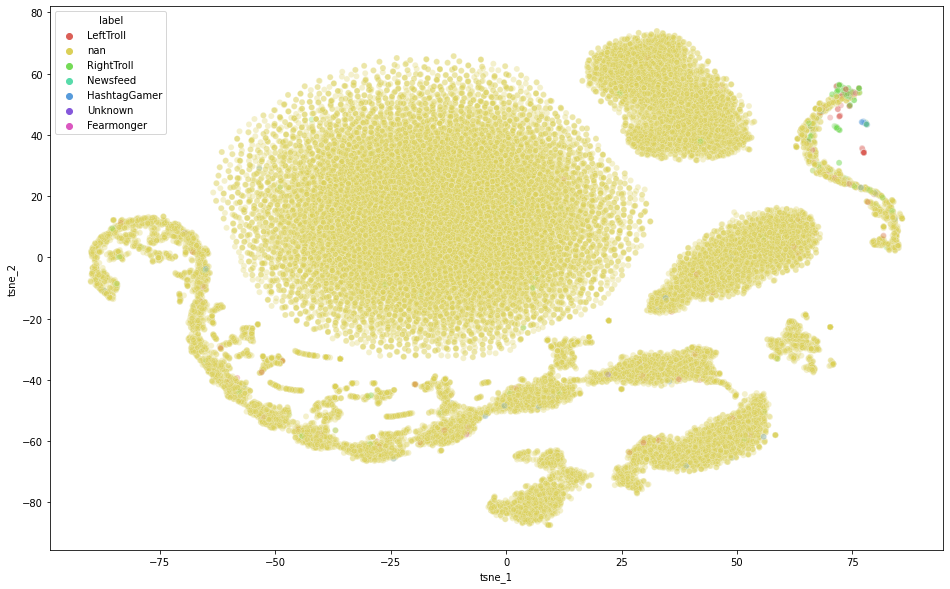

In [ ]:
plot_scatter(emb_df, hue='label')

In [ ]:
len(emb_df[emb_df['label']!='non-troll'])

179

In [ ]:
emb_test = emb_test

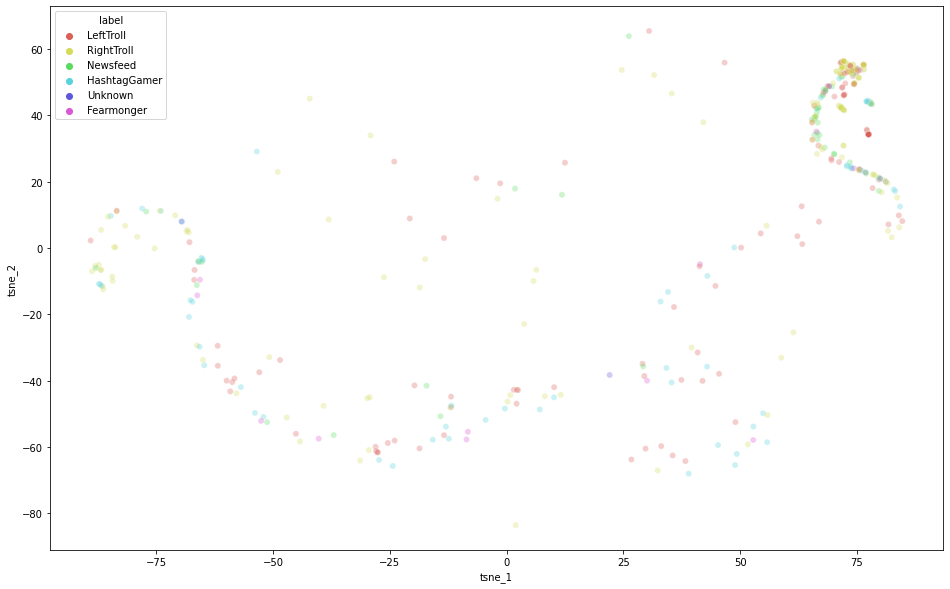

In [ ]:
plot_scatter(emb_df[emb_df['label']!='nan'], hue='label')

In [ ]:
emb_df.to_csv(os.path.join(path_to_data_dir, 'embedding_with_tsne.csv'))

In [ ]:
emb_df

,user,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_58,emb_59,emb_60,emb_61,emb_62,emb_63,emb_64,tsne_1,tsne_2,label
0,02fdbbce9f36a93ed8056e0a1b02a857a0bce32e7d96d0...,-2.421352,-0.032351,0.247697,-1.994104,-1.716042,-0.883603,-1.889648,1.371254,-1.301127,...,-1.220920,-1.869824,0.008200,0.071863,-0.143767,-0.872912,-0.362680,8.255129,-71.119865,LeftTroll
1,3068852509,-1.116546,-0.483241,-0.088187,-0.931571,-0.905063,-0.297405,-0.673428,0.430103,-0.896111,...,-0.705234,-1.079933,0.210007,-0.096680,0.473998,-0.620248,-0.181763,16.042950,-72.309677,non-troll
2,3177941678,-1.579564,-0.707587,-0.093770,-1.244102,-1.393834,-0.386059,-0.941636,0.690083,-1.227589,...,-0.952351,-1.544103,0.309386,-0.147939,0.725686,-0.908335,-0.305130,8.660844,-71.256607,non-troll
3,330564612,-1.315887,-0.577178,-0.094307,-1.085646,-1.094785,-0.336672,-0.791319,0.537421,-1.031009,...,-0.835752,-1.270636,0.243439,-0.126667,0.579721,-0.715816,-0.231236,11.313679,-71.620735,non-troll
4,0994abf9fb8fe1bf699d0e101e9603b30f369e94a0eec1...,-1.207787,-0.297837,0.190627,-1.001225,-0.225831,0.118807,-0.308553,-0.389791,-0.849550,...,-1.304049,-1.474878,0.605987,-0.271850,0.334097,-0.510801,0.357378,17.099379,-65.555481,RightTroll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85830,454940397,-0.980762,-0.374986,-0.045353,-0.855774,-0.815012,-0.264202,-0.582968,0.317144,-0.819663,...,-0.653431,-0.938778,0.182800,-0.122729,0.443738,-0.502283,-0.126826,20.388130,-70.606331,non-troll
85831,fb8c9c183270bb99c709f65127424d7d4d7d8ec1c687d6...,-1.063144,-0.121353,0.111567,-1.354442,-1.318123,-1.473742,-0.632895,0.660260,-0.835971,...,-0.486169,-1.433147,0.615317,0.321139,0.422190,-1.775813,0.517119,12.666926,-65.775032,RightTroll
85832,1002161534,-1.223734,-0.501418,-0.042273,-1.049152,-1.043514,-0.325808,-0.713981,0.444878,-0.958221,...,-0.766862,-1.178770,0.231121,-0.134653,0.569795,-0.647398,-0.181529,12.497862,-71.825554,non-troll
85833,1721048484,-0.739172,-0.276249,-0.031793,-0.667951,-0.607371,-0.202416,-0.436409,0.236950,-0.603364,...,-0.497635,-0.706264,0.139097,-0.094681,0.322184,-0.369575,-0.095975,25.093647,-57.439678,non-troll


#classifier for troll detection

In [ ]:
interactions_df_name = 'joined_users_dataset.csv'
interactions_df_path = os.path.join(path_to_data_dir, interactions_df_name)
interactions_df = pd.read_csv(interactions_df_path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,7,9,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
interactions_df

,tweet_id,userid_hash,user_screen_name_hash,final_profile_description,followers_mis,tweet_time,retweet_userid,in_reply_to_userid,account_type_mis,rt_atype,...,retweet,account_category,new_june_2018,alt_external_id,article_url,tco1_step1,tco2_step1,tco3_step1,target_id,target_type
0,552475834658086912,71db45e4783602194ced17d50c4070036dfc754e9557fe...,71db45e4783602194ced17d50c4070036dfc754e9557fe...,"Very outspoken, but don't take it for anger. x...",64.0,2015-01-06 14:44,NaN,NaN,LeftTroll,NaN,...,0,LeftTroll,0,1.652139e+09,http://twitter.com/acejinev/statuses/552475834...,NaN,NaN,NaN,not_inter,not_inter
1,552475784288690176,71db45e4783602194ced17d50c4070036dfc754e9557fe...,71db45e4783602194ced17d50c4070036dfc754e9557fe...,"Very outspoken, but don't take it for anger. x...",64.0,2015-01-06 14:44,NaN,NaN,LeftTroll,NaN,...,0,LeftTroll,0,1.652139e+09,http://twitter.com/acejinev/statuses/552475784...,NaN,NaN,NaN,not_inter,not_inter
2,552475721374121984,ef983249ef6ed5de427c4dc19ad6d966c6cf572c2505e4...,ef983249ef6ed5de427c4dc19ad6d966c6cf572c2505e4...,Fun-loving conservative sharing the truth that...,60.0,2015-01-06 14:44,NaN,NaN,RightTroll,NaN,...,0,RightTroll,0,1.629828e+09,http://twitter.com/cassishere/statuses/5524757...,NaN,NaN,NaN,not_inter,not_inter
3,552475758896353280,ef983249ef6ed5de427c4dc19ad6d966c6cf572c2505e4...,ef983249ef6ed5de427c4dc19ad6d966c6cf572c2505e4...,Fun-loving conservative sharing the truth that...,60.0,2015-01-06 14:44,NaN,NaN,RightTroll,NaN,...,0,RightTroll,0,1.629828e+09,http://twitter.com/cassishere/statuses/5524757...,NaN,NaN,NaN,not_inter,not_inter
4,552475998676348928,71db45e4783602194ced17d50c4070036dfc754e9557fe...,71db45e4783602194ced17d50c4070036dfc754e9557fe...,"Very outspoken, but don't take it for anger. x...",64.0,2015-01-06 14:45,NaN,NaN,LeftTroll,NaN,...,0,LeftTroll,0,1.652139e+09,http://twitter.com/acejinev/statuses/552475998...,NaN,NaN,NaN,not_inter,not_inter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231976,970782155545616384,614f89a51cf6d006a3f2e535551203421fa024824e6e07...,614f89a51cf6d006a3f2e535551203421fa024824e6e07...,"Patriot, love my country and want to improve it!",1226.0,2018-03-05 22:04,NaN,NaN,RightTroll,NaN,...,0,RightTroll,1,9.123939e+17,http://twitter.com/912393907069059072/statuses...,NaN,NaN,NaN,not_inter,not_inter
231977,971908897324716032,614f89a51cf6d006a3f2e535551203421fa024824e6e07...,614f89a51cf6d006a3f2e535551203421fa024824e6e07...,"Patriot, love my country and want to improve it!",1266.0,2018-03-09 00:41,NaN,NaN,RightTroll,NaN,...,0,RightTroll,1,9.123939e+17,http://twitter.com/912393907069059072/statuses...,https://twitter.com/BarbaraForTrump/status/971...,NaN,NaN,not_inter,not_inter
231978,974420384417177600,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,"Your daily source of Conservative news, analy...",1237.0,2018-03-15 23:01,NaN,NaN,RightTroll,NaN,...,0,RightTroll,1,9.047532e+17,http://twitter.com/904753226825719809/statuses...,https://twitter.com/Amconvoice/status/97442038...,NaN,NaN,not_inter,not_inter
231979,975810306827083776,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,"Your daily source of Conservative news, analy...",1234.0,2018-03-19 19:04,NaN,NaN,RightTroll,NaN,...,0,RightTroll,1,9.047532e+17,http://twitter.com/904753226825719809/statuses...,https://twitter.com/Breaking911/status/9758079...,NaN,NaN,not_inter,not_inter


In [ ]:
emb_df

,user,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_55,emb_56,emb_57,emb_58,emb_59,emb_60,emb_61,emb_62,emb_63,emb_64
0,02fdbbce9f36a93ed8056e0a1b02a857a0bce32e7d96d0...,1.459145,0.521306,2.038367,0.145221,-1.021477,-0.739465,0.734467,-0.808959,-0.325866,...,0.352702,-1.214321,-0.166637,-0.696916,0.535568,0.733094,1.146484,-2.051864,1.111681,-1.642789
1,3177941678,0.756345,0.580566,1.297556,0.803042,-1.068037,0.528321,0.695927,-1.318989,-0.982950,...,-0.422194,-1.360947,-0.222614,-1.015623,-0.080794,1.364994,0.597030,-1.228449,0.431284,-0.601299
2,330564612,0.554813,0.497018,1.012360,0.692524,-0.810237,0.426484,0.493860,-1.019578,-0.753218,...,-0.342200,-1.130668,-0.165342,-0.797173,-0.067647,1.113815,0.419038,-0.947977,0.317729,-0.451417
3,0994abf9fb8fe1bf699d0e101e9603b30f369e94a0eec1...,0.479320,0.058690,0.711951,1.268163,-1.191355,-0.472261,-0.199045,0.055037,0.322526,...,1.559765,-0.755013,-1.201352,-1.077725,-0.738255,1.736966,-0.533010,-1.274917,1.151223,-0.002765
4,0e45d2af1bbca512ab1d8fa1c2216c038f9627bb773ab4...,0.196482,0.164263,0.255497,0.073761,-0.236018,-0.004619,0.181929,-0.160042,-0.138963,...,-0.031774,-0.186530,-0.134079,-0.139419,0.114101,0.233647,0.080114,-0.249200,0.193943,-0.149354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43264,fb8c9c183270bb99c709f65127424d7d4d7d8ec1c687d6...,0.029824,0.706280,-0.059921,-0.076049,-0.129432,-0.735435,1.228188,-1.193521,-1.873720,...,-0.000388,-0.749768,0.670452,0.299648,-0.021897,1.400311,0.199417,-1.090483,1.506035,0.238152
43265,1002161534,0.911462,0.557971,0.931158,0.181093,-1.015321,0.011104,0.770864,-0.776231,-0.639471,...,-0.095776,-0.594809,-0.477651,-0.625771,0.417647,0.860784,0.318262,-1.032291,0.857788,-0.606055
43266,fce0c0c9edffee58c42bc516fba2d72d3c8bb775fecc31...,1.130681,0.259967,1.421819,0.312758,-1.950095,0.297211,1.412762,-0.768961,-0.021406,...,-0.466756,-0.367930,-0.681630,-0.739326,0.810310,0.811297,0.555770,-1.401411,0.761334,-1.259905
43267,1721048484,0.673929,0.497208,0.751904,0.149307,-0.721006,0.007455,0.629366,-0.499930,-0.411013,...,-0.064468,-0.453825,-0.386569,-0.419479,0.319703,0.602912,0.244302,-0.794598,0.580155,-0.472706


In [ ]:
embeddings = {}
emb_cols = [f'emb_{i}' for i in range(1, 65)]
for index, row in emb_df.iterrows():
  embeddings[str(row['user'])] = row[emb_cols].to_numpy()

In [ ]:
interactions_df_name = 'weighted_interactions.csv'
interactions_df_path = os.path.join(path_to_data_dir, interactions_df_name)
interactions_df = pd.read_csv(interactions_df_path)

In [ ]:
communications = {}
for index,row in interactions_df.iterrows():
  if (row['target_id'],row['userid_hash']) in communications:
    communications[(row['target_id'],row['userid_hash'])] = communications[(row['target_id'],row['userid_hash'])] + row['tweet_id']
  else:
    communications[(row['userid_hash'],row['target_id'])] = row['tweet_id']
new_interactions_df = []
for key in communications.keys():
  new_interactions_df.append([key[0], key[1], communications[key]])

new_interactions_df=pd.DataFrame(new_interactions_df, columns= ['user1', 'user2', 'communications'])

In [ ]:
new_interactions_df.to_csv(os.path.join(path_to_data_dir, 'undirected_interactions.csv'))

In [ ]:
all_trolls = [troll for troll in labels.keys() if labels[troll]!='nan']

In [ ]:
df_lst = []
cols = ['user_id', 'troll_label', 'number_of_communications', 'user_label']
for troll in all_trolls:
  troll_df = new_interactions_df[(new_interactions_df['user1']==troll) | (new_interactions_df['user2']==troll)]
  for index,row in troll_df.iterrows():
    user = row['user1'] if row['user1']!= troll else row['user2']
    user = str(user)
    emb = list((embeddings[troll]+embeddings[user]/2))
    user_cols = [user,labels[troll], row['communications'], labels[user]]
    df_lst.append(user_cols+emb)
classifier_df = pd.DataFrame(df_lst, columns = cols+emb_cols)

In [ ]:
classifier_df

,user_id,troll_label,number_of_communications,user_label,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,...,emb_55,emb_56,emb_57,emb_58,emb_59,emb_60,emb_61,emb_62,emb_63,emb_64
0,1687183549,LeftTroll,1,LeftTroll,0.202276,0.127061,0.567132,-0.349819,-0.506827,-0.185264,...,-0.447702,0.071170,0.098794,-0.478467,0.668256,-0.146865,0.674595,-0.434518,-0.154444,-0.209969
1,1718000594,LeftTroll,1,HashtagGamer,0.419474,-0.008199,-0.117754,-0.396011,-0.370836,-0.229215,...,0.223818,-0.081827,0.210631,0.275652,0.120334,0.666417,-0.081057,-0.347157,1.012941,-0.132175
2,3f22ec97e6f7c68c28e59390710135dbfd067aa024eeb3...,LeftTroll,1,LeftTroll,-0.079512,-0.001999,0.934804,0.410658,-0.370704,0.182939,...,-0.137064,-0.363857,-0.428239,-0.245895,0.756235,-0.217674,0.641054,-0.283789,-0.254414,-0.125107
3,1687183549,LeftTroll,6,LeftTroll,-0.206647,-0.102996,2.131658,0.372052,-1.006897,0.166140,...,-0.660425,-0.406521,-0.653454,-0.809412,2.049241,-0.867761,1.868180,-0.720257,-0.875994,-0.284781
4,100136358,LeftTroll,5,nan,-0.109897,0.024445,1.940969,0.839999,-0.822278,0.356544,...,-0.269596,-0.767987,-0.918671,-0.541561,1.544118,-0.370118,1.299379,-0.653488,-0.435117,-0.297721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82503,99137755,RightTroll,1,nan,0.513093,-0.635781,0.682271,0.470240,-0.192789,-0.112596,...,1.955980,-0.052762,-1.790098,-1.249961,-1.017843,-0.281502,-0.748251,-2.114403,-0.372351,-0.224975
82504,993472777,RightTroll,1,nan,0.516535,-0.637888,0.679087,0.473550,-0.193893,-0.108940,...,1.953162,-0.052451,-1.791014,-1.249173,-1.018502,-0.283391,-0.746750,-2.111738,-0.375092,-0.223620
82505,995822395,RightTroll,1,nan,0.515912,-0.640094,0.682958,0.472595,-0.196845,-0.110148,...,1.950580,-0.052380,-1.793749,-1.248493,-1.013123,-0.282719,-0.746862,-2.113425,-0.376261,-0.219058
82506,999453985,RightTroll,1,nan,0.587344,-0.562680,0.776905,0.512351,-0.272947,-0.115173,...,1.939579,-0.134186,-1.835567,-1.305117,-0.971598,-0.192972,-0.727853,-2.200494,-0.296659,-0.277135


In [ ]:
troll_onehot = pd.get_dummies(classifier_df.troll_label)
for col in troll_onehot.columns:
  classifier_df[col] = troll_onehot[col]

## calssify troll

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, f1_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt     
from matplotlib import cm
from matplotlib.colors import LogNorm, Normalize

In [ ]:
X= classifier_df.drop(columns = ['user_id', 'troll_label','user_label'])
y= classifier_df['user_label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
y_pred =clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


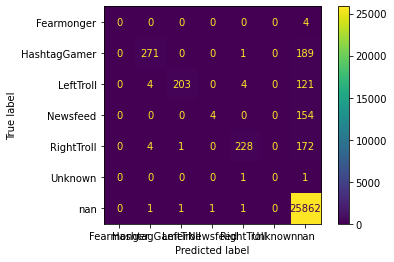

<Figure size 720x720 with 0 Axes>

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

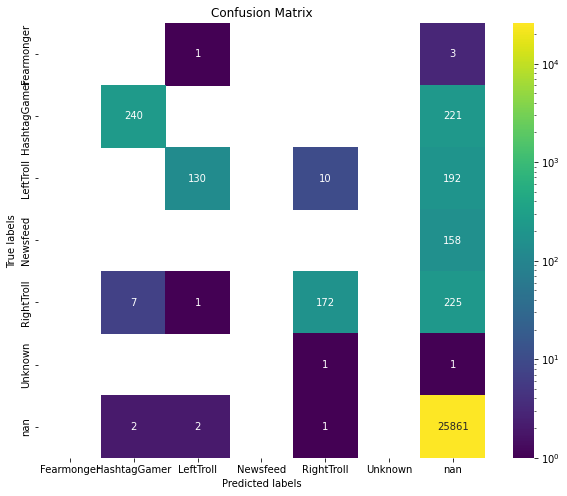

In [ ]:

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
colors = cm.get_cmap('viridis',25862)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax, norm=LogNorm(), cmap=colors);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fearmonger', 'HashtagGamer','LeftTroll', 'Newsfeed', 'RightTroll', 'Unknown','nan']); ax.yaxis.set_ticklabels(['Fearmonger', 'HashtagGamer','LeftTroll', 'Newsfeed', 'RightTroll', 'Unknown','nan']);

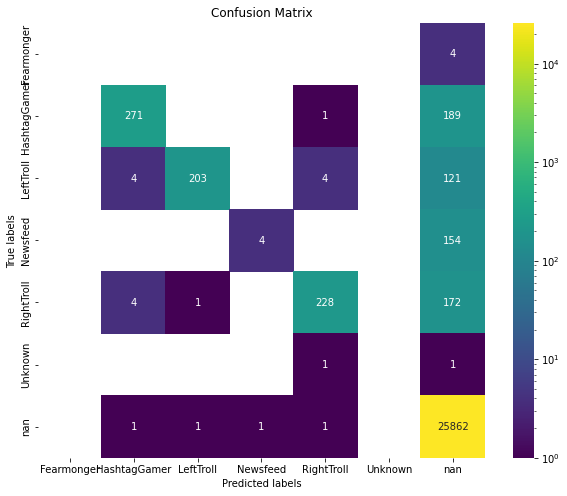

In [ ]:

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax, norm=LogNorm(), cmap=colors);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fearmonger', 'HashtagGamer','LeftTroll', 'Newsfeed', 'RightTroll', 'Unknown','nan']); ax.yaxis.set_ticklabels(['Fearmonger', 'HashtagGamer','LeftTroll', 'Newsfeed', 'RightTroll', 'Unknown','nan']);

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.4003873639353784

In [ ]:
f1_score(y_test, y_pred, average='micro')

0.9697003085059498

In [ ]:
start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.036 seconds


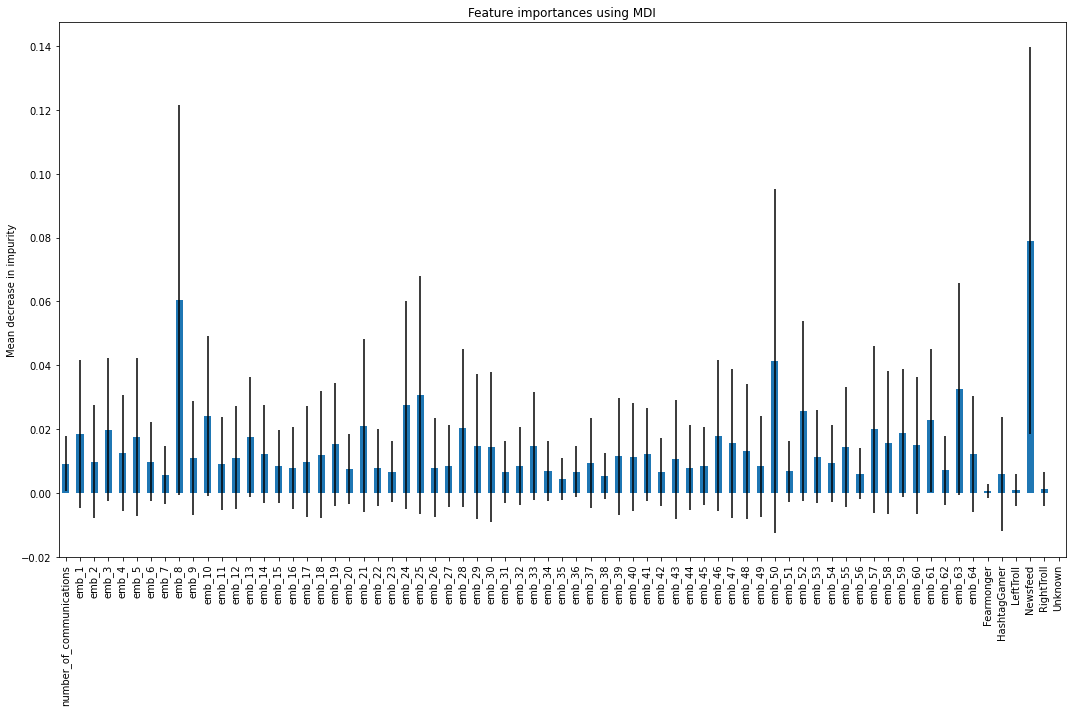

In [ ]:
forest_importances = pd.Series(clf.feature_importances_, index=list(X.columns))

fig, ax = plt.subplots(figsize=(15,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

##Classify troll using content

In [ ]:
content_name = 'joined_users_dataset_content_emb.csv'
content_df_name = os.path.join(path_to_data_dir, content_name)
content_df = pd.read_csv(content_df_name, index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,7,9,10,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
content_df.columns[:30]

Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date', 'following', 'followers', 'updates',
       'post_type', 'account_type', 'retweet', 'account_category',
       'new_june_2018', 'alt_external_id', 'tweet_id', 'article_url',
       'tco1_step1', 'tco2_step1', 'tco3_step1', 'UID', 'clean_content',
       'content_embedding_0', 'content_embedding_1', 'content_embedding_2',
       'content_embedding_3', 'content_embedding_4', 'content_embedding_5',
       'content_embedding_6'],
      dtype='object')

In [ ]:
content_df

,userid_hash,user_screen_name_hash,final_profile_description,followers_mis,tweet_time,retweet_userid,in_reply_to_userid,account_type_mis,rt_atype,reply_atype,...,content_embedding_290,content_embedding_291,content_embedding_292,content_embedding_293,content_embedding_294,content_embedding_295,content_embedding_296,content_embedding_297,content_embedding_298,content_embedding_299
tweet_id,,,,,,,,,,,,,,,,,,,,,
556030482886844416,3f22ec97e6f7c68c28e59390710135dbfd067aa024eeb3...,3f22ec97e6f7c68c28e59390710135dbfd067aa024eeb3...,"A world for a few, a few to justice, lands in ...",98.0,2015-01-16 10:09,353e66426b732cbce1b0b7c5ca057d3c9c522cad1cdbcc...,NaN,LeftTroll,LeftTroll,NaN,...,-0.091192,0.094360,-0.141634,-0.242046,0.100417,-0.064156,-0.124303,-0.148484,0.254426,0.008176
556143108426313728,2742482932,cascaseyp,Do not let what you cannot do interfere with w...,2.0,2015-01-16 17:37,8da4056b67e1ff9b16609e078941e31f4f8234f062dda1...,NaN,HashtagGamer,Fearmonger,NaN,...,-0.175696,0.036267,-0.225722,-0.114015,0.322624,-0.097068,-0.145975,-0.083524,0.371038,0.176266
557440559439437824,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,embrace yourself,8.0,2015-01-20 07:32,NaN,aa2d23906fee5e96183b638522032d61cf99f04b6c9d12...,HashtagGamer,NaN,Fearmonger,...,-0.140113,-0.042231,-0.042652,-0.134230,0.112071,-0.066461,-0.117602,-0.095161,0.032656,0.113165
557441469888602112,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,embrace yourself,8.0,2015-01-20 07:36,NaN,2537451658,HashtagGamer,NaN,NaN,...,-0.250280,0.036829,-0.062994,-0.069215,0.166131,-0.012375,-0.074893,-0.100294,0.052918,-0.104190
557442571895832576,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,embrace yourself,8.0,2015-01-20 07:40,NaN,2497132682,HashtagGamer,NaN,NaN,...,-0.164095,0.059939,-0.172296,0.024317,0.087080,0.095801,-0.034615,0.128758,0.034640,0.130946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952302806760763392,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,"Your daily source of Conservative news, analy...",1264.0,2018-01-13 22:14,NaN,25073877,RightTroll,NaN,NaN,...,-0.093702,-0.056393,-0.106377,-0.228239,0.156251,-0.036148,-0.054528,-0.075549,-0.040436,0.028885
952314071398756352,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,"Your daily source of Conservative news, analy...",1265.0,2018-01-13 22:59,NaN,3028493620,RightTroll,NaN,NaN,...,-0.084445,0.070672,-0.071385,-0.116805,0.162633,0.024723,-0.077735,-0.087820,-0.103081,0.050643
952389223771914240,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,"Your daily source of Conservative news, analy...",1267.0,2018-01-14 03:57,78523300.0,NaN,RightTroll,NaN,NaN,...,-0.079716,-0.028181,0.014484,-0.179457,-0.293486,-0.111177,0.077526,-0.069561,0.069693,-0.129021


In [ ]:
content_df = content_df[content_df['target_id']!='not_inter']

In [ ]:
emb_cols = [f'content_embedding_{i}' for i in range(300)]
content_df['user_label'] = content_df['target_id'].apply(lambda x: labels[str(x)])

In [ ]:
X = content_df[emb_cols]
y = content_df['user_label']

In [ ]:
y

502        LeftTroll
523       Fearmonger
579       Fearmonger
581              nan
584              nan
             ...    
231930           nan
231931           nan
231934           nan
231950           nan
231970           nan
Name: user_label, Length: 178084, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
content_df['user_label']

502        LeftTroll
523       Fearmonger
579       Fearmonger
581              nan
584              nan
             ...    
231930           nan
231931           nan
231934           nan
231950           nan
231970           nan
Name: user_label, Length: 178084, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred =clf.predict(X_test)

In [ ]:
y_pred = [int(i) for i in y_pred]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     
from matplotlib import cm
from matplotlib.colors import LogNorm, Normalize

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax, norm=LogNorm(), cmap=colors);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fearmonger', 'HashtagGamer','LeftTroll', 'Newsfeed', 'RightTroll', 'Unknown','nan']); ax.yaxis.set_ticklabels(['Fearmonger', 'HashtagGamer','LeftTroll', 'Newsfeed', 'RightTroll', 'Unknown','nan']);

In [ ]:
accuracy_score(y_test, y_pred)

0.24028382793356928

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.1193528672500264

In [ ]:
start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.087 seconds


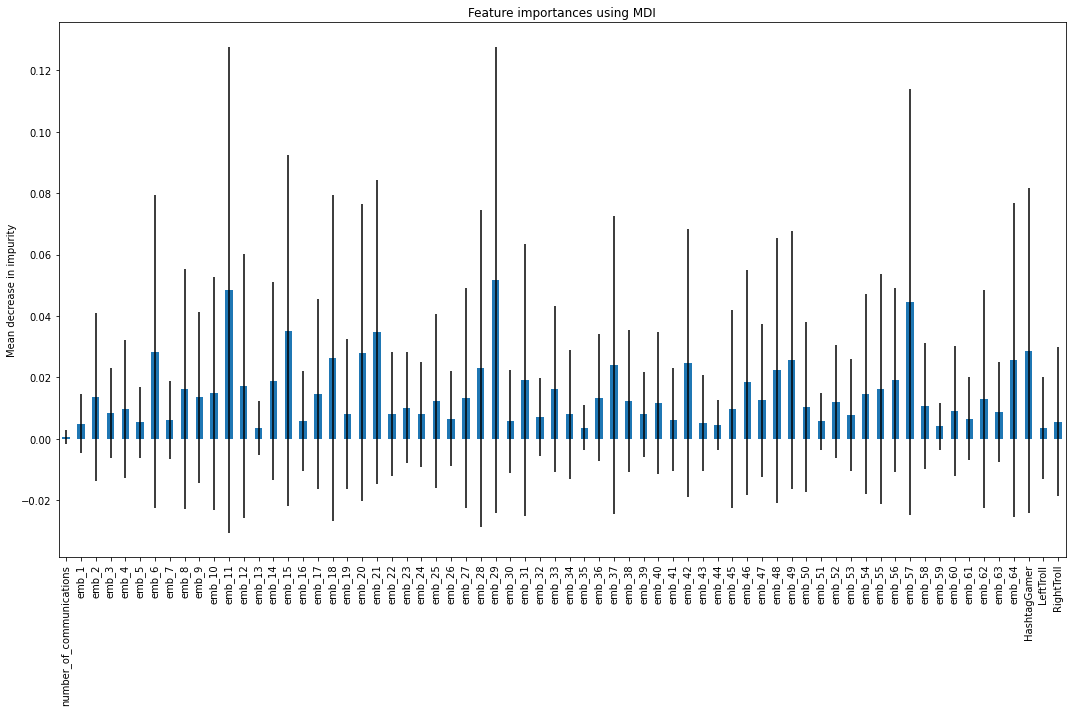

In [ ]:
forest_importances = pd.Series(clf.feature_importances_, index=list(X.columns))

fig, ax = plt.subplots(figsize=(15,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## classify using context and communications

In [ ]:
content_name = 'joined_users_dataset_content_embeddings.csv'
content_df_name = os.path.join(path_to_data_dir, content_name)
content_df = pd.read_csv(content_df_name, index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
content_df = content_df[content_df['target_id']!='not_inter']

In [ ]:
content_df

,tweet_id,userid_hash,final_profile_description,content,target_id,target_type,c_emb_0,c_emb_1,c_emb_2,c_emb_3,...,c_emb_374,c_emb_375,c_emb_376,c_emb_377,c_emb_378,c_emb_379,c_emb_380,c_emb_381,c_emb_382,c_emb_383
502,556030482886844416,3f22ec97e6f7c68c28e59390710135dbfd067aa024eeb3...,"A world for a few, a few to justice, lands in ...","#OscarsSoWhite Hold on to your Salah, because ...",353e66426b732cbce1b0b7c5ca057d3c9c522cad1cdbcc...,LeftTroll,0.481920,0.823705,0.302891,0.071266,...,0.413754,-0.136823,0.182264,0.288551,-0.030917,0.398294,0.824333,-0.279579,-0.075269,0.453872
523,556143108426313728,2742482932,Do not let what you cannot do interfere with w...,#IamonFIRE because I can do what you can't h...,8da4056b67e1ff9b16609e078941e31f4f8234f062dda1...,Fearmonger,-0.110597,0.133310,-0.094429,-0.044616,...,0.140267,-0.048300,0.204762,-0.139166,-0.076479,0.207940,0.474285,0.379191,0.064118,-0.221334
579,557440559439437824,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,embrace yourself,'@iwant2beme Many thing aren't equal but every...,aa2d23906fee5e96183b638522032d61cf99f04b6c9d12...,Fearmonger,0.111998,0.202528,-0.003859,-0.105406,...,0.239102,-0.354247,-0.001858,-0.007510,0.206841,0.078062,0.254618,0.003302,0.183200,-0.305800
581,557441469888602112,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,embrace yourself,'@Lucile_Barber The roads we take are more imp...,2537451658,NaN,0.466891,0.335605,0.159645,-0.338718,...,0.529193,0.167614,-0.203298,0.028868,0.023273,-0.097055,0.310481,-0.119730,-0.066588,-0.113377
584,557442571895832576,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,embrace yourself,'@TracyAlexx Talk sense to a fool and he calls...,2497132682,NaN,0.001565,0.163443,0.059186,-0.190082,...,0.267561,-0.188052,0.004612,-0.073410,-0.541303,0.111216,0.014108,0.215033,0.149191,-0.269423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231930,952302806760763392,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,"Your daily source of Conservative news, analy...",'@realDonaldTrump Mass Media is a fifth column...,25073877,NaN,0.095219,-0.177617,-0.137087,-0.324520,...,0.118125,-0.138288,0.066359,0.027690,0.033220,0.036827,0.010226,0.150827,0.051308,0.193126
231931,952314071398756352,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,"Your daily source of Conservative news, analy...",'@KimberlyMrsR1 What should we be thankful for...,3028493620,NaN,-0.113031,0.177965,0.334531,-0.139656,...,0.283788,-0.260923,-0.041846,-0.287508,0.321210,-0.284735,-0.276785,0.135174,0.434846,-0.054629
231934,952389223771914240,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,"Your daily source of Conservative news, analy...",You were impeached for perjury. Zip it. https:...,78523300,NaN,0.019553,0.450364,0.005995,-0.118563,...,0.421678,-0.051429,0.262019,-0.079237,-0.623804,0.322050,0.208326,0.218357,-0.207665,0.353715
231950,957368065661927424,8943b5302cc9da9aa441d6c322941e8aa4fbfbc5870f63...,"Your daily source of Conservative news, analy...",On Holocaust Remembrance Day we mourn and grie...,25073877,NaN,0.052388,0.678934,-0.406435,0.042717,...,0.086857,-0.252120,0.200027,0.092662,0.070605,0.186745,0.633802,-0.417669,-0.214473,-0.266169


In [ ]:
content_df['user_label'] = content_df['target_id'].apply(lambda x: labels[str(x)])

In [ ]:
new_interactions_df

,user1,user2,communications
0,02fdbbce9f36a93ed8056e0a1b02a857a0bce32e7d96d0...,3177941678,3
1,02fdbbce9f36a93ed8056e0a1b02a857a0bce32e7d96d0...,330564612,1
2,0994abf9fb8fe1bf699d0e101e9603b30f369e94a0eec1...,0994abf9fb8fe1bf699d0e101e9603b30f369e94a0eec1...,1
3,0994abf9fb8fe1bf699d0e101e9603b30f369e94a0eec1...,0e45d2af1bbca512ab1d8fa1c2216c038f9627bb773ab4...,1
4,0994abf9fb8fe1bf699d0e101e9603b30f369e94a0eec1...,100638300,7
...,...,...,...
80447,fd1c978b6d412419d37b646d5f0ac359db4b38f4879b0e...,26642006,1
80448,fd1c978b6d412419d37b646d5f0ac359db4b38f4879b0e...,29611918,1
80449,fd1c978b6d412419d37b646d5f0ac359db4b38f4879b0e...,480930665,1
80450,fd1c978b6d412419d37b646d5f0ac359db4b38f4879b0e...,74773917,1


In [ ]:
emb_context_cols = [f'c_emb_{i}' for i in range(384)]
df_lst = []
cols = ['user_id', 'troll_label', 'number_of_communications', 'user_label']
num_of_zer = 0
for troll in all_trolls:
  troll_df = new_interactions_df[(new_interactions_df['user1']==troll) | (new_interactions_df['user2']==troll)]
  troll_content = content_df[(content_df['userid_hash']==troll) | (content_df['target_id']==troll)]
  for index,row in troll_df.iterrows():
    user = row['user1'] if row['user1']!= troll else row['user2']
    user = str(user)
    emb = list((embeddings[troll]+embeddings[user]/2))
    user_cols = [user,labels[troll], row['communications'], labels[user]]
    user_troll_content = troll_content[(troll_content['userid_hash']==user) | (troll_content['target_id']==user)]
    if len(user_troll_content)==0:
      user_troll_content_emb = [0]*384
      num_of_zer+=1
    else:
      user_troll_content_emb = np.mean(user_troll_content[emb_context_cols].to_numpy(),axis=0)
    # user_troll_content_emb = user_troll_content[emb_context_cols].iloc[0].to_numpy()
    df_lst.append(user_cols+emb+list(user_troll_content_emb))    
#classifier_df = pd.DataFrame(df_lst, columns = cols+emb_cols)

In [ ]:
emb_cols = [f'i_emb_{i}' for i in range(1, 65)]

In [ ]:
classifier_df = pd.DataFrame(df_lst, columns = cols + emb_cols + emb_context_cols)

In [ ]:
classifier_df.to_csv(os.path.join(path_to_data_dir, 'context_interaction_classifier.csv'))

In [ ]:
classifier_df

,user_id,troll_label,number_of_communications,user_label,i_emb_1,i_emb_2,i_emb_3,i_emb_4,i_emb_5,i_emb_6,...,c_emb_374,c_emb_375,c_emb_376,c_emb_377,c_emb_378,c_emb_379,c_emb_380,c_emb_381,c_emb_382,c_emb_383
0,1687183549,LeftTroll,1,LeftTroll,0.202276,0.127061,0.567132,-0.349819,-0.506827,-0.185264,...,-0.058138,-0.099707,0.341566,-0.140448,-0.250923,0.398119,-0.425858,-0.246781,0.134749,-0.178661
1,1718000594,LeftTroll,1,HashtagGamer,0.419474,-0.008199,-0.117754,-0.396011,-0.370836,-0.229215,...,0.072478,-0.206924,-0.137749,0.488083,0.230152,0.466107,0.258002,-0.188337,-0.344037,0.124936
2,3f22ec97e6f7c68c28e59390710135dbfd067aa024eeb3...,LeftTroll,1,LeftTroll,-0.079512,-0.001999,0.934804,0.410658,-0.370704,0.182939,...,0.413754,-0.136823,0.182264,0.288551,-0.030917,0.398294,0.824333,-0.279579,-0.075269,0.453872
3,1687183549,LeftTroll,6,LeftTroll,-0.206647,-0.102996,2.131658,0.372052,-1.006897,0.166140,...,0.155011,-0.337044,0.144963,0.108066,-0.289679,0.124942,0.291463,-0.332725,-0.048622,0.163398
4,100136358,LeftTroll,5,nan,-0.109897,0.024445,1.940969,0.839999,-0.822278,0.356544,...,-0.004911,-0.227318,0.063836,0.182090,-0.345906,-0.036688,0.210483,-0.228379,-0.057093,0.058799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82503,99137755,RightTroll,1,nan,0.513093,-0.635781,0.682271,0.470240,-0.192789,-0.112596,...,0.492111,-0.240392,0.032743,0.108119,0.045458,0.209912,0.519473,-0.223125,-0.351484,0.289065
82504,993472777,RightTroll,1,nan,0.516535,-0.637888,0.679087,0.473550,-0.193893,-0.108940,...,-0.095913,0.049580,0.325696,-0.473165,-0.227291,0.007682,0.455344,-0.314539,-0.209048,0.260435
82505,995822395,RightTroll,1,nan,0.515912,-0.640094,0.682958,0.472595,-0.196845,-0.110148,...,0.362790,0.075437,0.285000,-0.481390,0.248208,0.210505,0.157389,0.204699,0.140177,-0.433587
82506,999453985,RightTroll,1,nan,0.587344,-0.562680,0.776905,0.512351,-0.272947,-0.115173,...,0.190274,-0.547468,-0.057703,0.259915,-0.191918,-0.248385,0.522443,0.131043,0.304786,0.252663


In [ ]:
num_of_zer

68

## dnn model

In [ ]:
classifier_df = pd.read_csv(os.path.join(path_to_data_dir, 'context_interaction_classifier.csv'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input, concatenate, Dropout, BatchNormalization
from keras import Model
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils

In [ ]:
cols = ['user_id', 'troll_label', 'number_of_communications', 'user_label']
emb_cols = [f'i_emb_{i}' for i in range(1, 65)]
emb_context_cols = [f'c_emb_{i}' for i in range(384)]


In [ ]:
X = classifier_df[cols + emb_cols + emb_context_cols]
y = classifier_df['user_label']

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
dummy_y = np_utils.to_categorical(y)

In [ ]:
n_cls = len(classifier_df['user_label'].unique())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33, random_state=42)

In [ ]:
X_train_inter = X_train[emb_cols].values
X_train_cont = X_train[emb_context_cols].values
X_test_inter = X_test[emb_cols].values
X_test_cont = X_test[emb_context_cols].values

### interactions model

In [ ]:
interaction_input = Input(shape=(64,))
x = Dense(32, activation="relu")(interaction_input)
x = Dense(16, activation="relu")(x)
x = Dense(n_cls, activation="softmax")(x)
inter_model = Model(inputs=interaction_input, outputs=x)

In [ ]:
inter_model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
history = inter_model.fit(X_train_inter,y_train, validation_data=(X_test_inter,y_test), epochs=100, batch_size=128)

Epoch 1/100
432/432 [==============================] - 6s 5ms/step - loss: 0.3429 - accuracy: 0.9206 - val_loss: 0.1964 - val_accuracy: 0.9492
Epoch 2/100
432/432 [==============================] - 2s 5ms/step - loss: 0.1808 - accuracy: 0.9535 - val_loss: 0.1770 - val_accuracy: 0.9541
Epoch 3/100
432/432 [==============================] - 2s 4ms/step - loss: 0.1697 - accuracy: 0.9569 - val_loss: 0.1704 - val_accuracy: 0.9565
Epoch 4/100
432/432 [==============================] - 2s 4ms/step - loss: 0.1648 - accuracy: 0.9585 - val_loss: 0.1678 - val_accuracy: 0.9576
Epoch 5/100
432/432 [==============================] - 2s 4ms/step - loss: 0.1604 - accuracy: 0.9599 - val_loss: 0.1632 - val_accuracy: 0.9593
Epoch 6/100
432/432 [==============================] - 2s 4ms/step - loss: 0.1569 - accuracy: 0.9605 - val_loss: 0.1643 - val_accuracy: 0.9596
Epoch 7/100
432/432 [==============================] - 2s 4ms/step - loss: 0.1537 - accuracy: 0.9616 - val_loss: 0.1631 - val_accuracy: 0.9586

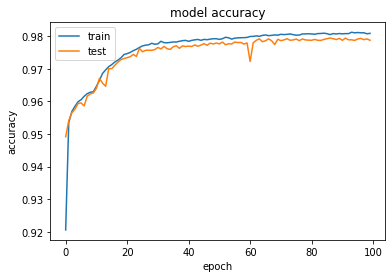

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

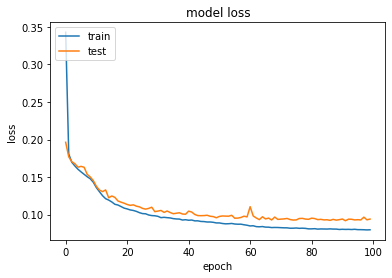

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = inter_model.predict(X_test_inter)

In [ ]:
X_test['interactions_predictions'] = y_pred.argmax(axis=1)

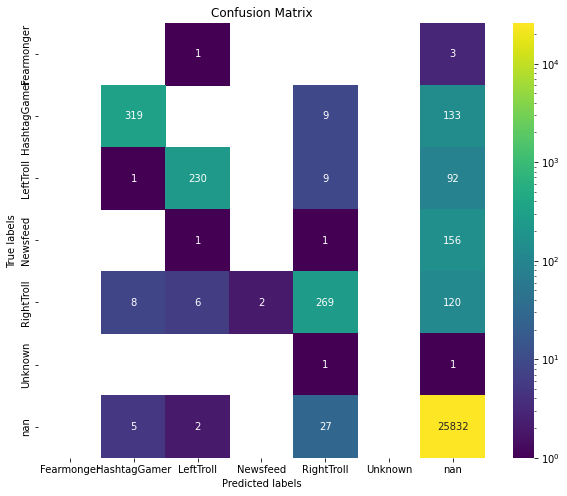

In [ ]:

conf_mat = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize=(10,8))
colors = cm.get_cmap('viridis',25862)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax, norm=LogNorm(), cmap=colors);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fearmonger', 'HashtagGamer','LeftTroll', 'Newsfeed', 'RightTroll', 'Unknown','nan']); ax.yaxis.set_ticklabels(['Fearmonger', 'HashtagGamer','LeftTroll', 'Newsfeed', 'RightTroll', 'Unknown','nan']);

In [ ]:
f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')

0.4776547183482351

In [ ]:
accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

0.9787718525047745

### content model

In [ ]:
content_input = Input(shape=(384,))
x = Dense(128, activation="relu")(content_input)
x = Dense(32, activation="relu")(x)
x = Dense(16, activation="relu")(x)
x = Dense(n_cls, activation="softmax")(x)
content_model = Model(inputs=content_input, outputs=x)

In [ ]:
content_model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
history = content_model.fit(X_train_cont,y_train, validation_data=(X_test_cont,y_test), epochs=100, batch_size=128)

Epoch 1/100
432/432 [==============================] - 3s 6ms/step - loss: 0.2483 - accuracy: 0.9485 - val_loss: 0.1724 - val_accuracy: 0.9547
Epoch 2/100
432/432 [==============================] - 2s 5ms/step - loss: 0.1510 - accuracy: 0.9575 - val_loss: 0.1387 - val_accuracy: 0.9614
Epoch 3/100
432/432 [==============================] - 2s 5ms/step - loss: 0.1166 - accuracy: 0.9658 - val_loss: 0.1227 - val_accuracy: 0.9660
Epoch 4/100
432/432 [==============================] - 2s 5ms/step - loss: 0.0917 - accuracy: 0.9720 - val_loss: 0.1157 - val_accuracy: 0.9683
Epoch 5/100
432/432 [==============================] - 2s 4ms/step - loss: 0.0732 - accuracy: 0.9767 - val_loss: 0.1073 - val_accuracy: 0.9693
Epoch 6/100
432/432 [==============================] - 2s 4ms/step - loss: 0.0589 - accuracy: 0.9802 - val_loss: 0.1063 - val_accuracy: 0.9701
Epoch 7/100
432/432 [==============================] - 2s 5ms/step - loss: 0.0495 - accuracy: 0.9831 - val_loss: 0.1107 - val_accuracy: 0.9718

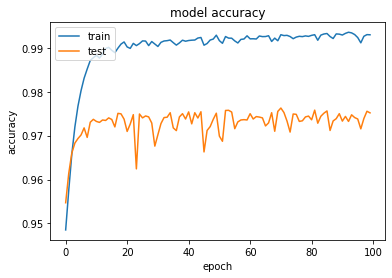

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

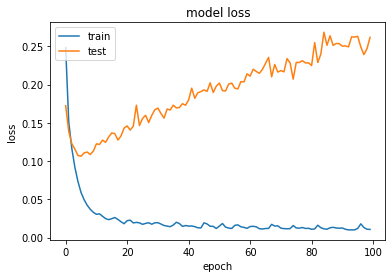

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = content_model.predict(X_test_cont)
X_test['content_predictions'] = y_pred.argmax(axis=1)

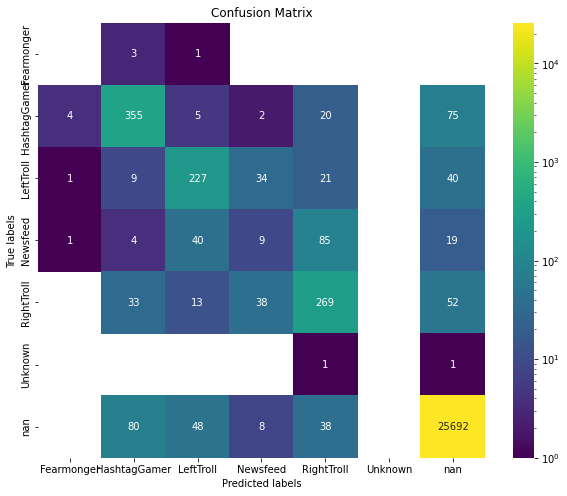

In [ ]:
conf_mat = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize=(10,8))
colors = cm.get_cmap('viridis',25862)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax, norm=LogNorm(), cmap=colors);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fearmonger', 'HashtagGamer','LeftTroll', 'Newsfeed', 'RightTroll', 'Unknown','nan']); ax.yaxis.set_ticklabels(['Fearmonger', 'HashtagGamer','LeftTroll', 'Newsfeed', 'RightTroll', 'Unknown','nan']);

In [ ]:
f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')

0.44850809158260263

In [ ]:
accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

0.9751726164242691

### combined model

In [ ]:
interaction_input = Input(shape=(64,))
context_input = Input(shape=(384,))
x = Dense(32, activation="relu")(interaction_input)
x = Dense(16, activation="relu")(x)
x = Model(inputs=interaction_input, outputs=x)
y = Dense(128, activation="relu")(context_input)
y = Dense(32, activation="relu")(y)
y = Dense(16, activation="relu")(y)
y = Model(inputs=context_input, outputs=y)
combined = concatenate([x.output, y.output])
z = Dense(16, activation="relu")(combined)
z = Dense(n_cls, activation="softmax")(z)
model = Model(inputs=[interaction_input,context_input], outputs=z)

In [ ]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
# y.fit(X_train_cont,y_train, epochs=10, batch_size=256)
history = model.fit([X_train_inter, X_train_cont],y_train, validation_data=([X_test_inter, X_test_cont],y_test), epochs=100, batch_size=128)

Epoch 1/100
432/432 [==============================] - 4s 8ms/step - loss: 0.0706 - accuracy: 0.9793 - val_loss: 0.0850 - val_accuracy: 0.9757
Epoch 2/100
432/432 [==============================] - 2s 5ms/step - loss: 0.0534 - accuracy: 0.9847 - val_loss: 0.0811 - val_accuracy: 0.9783
Epoch 3/100
432/432 [==============================] - 2s 5ms/step - loss: 0.0429 - accuracy: 0.9875 - val_loss: 0.0769 - val_accuracy: 0.9801
Epoch 4/100
432/432 [==============================] - 2s 5ms/step - loss: 0.0345 - accuracy: 0.9901 - val_loss: 0.0750 - val_accuracy: 0.9804
Epoch 5/100
432/432 [==============================] - 2s 5ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0930 - val_accuracy: 0.9744
Epoch 6/100
432/432 [==============================] - 3s 6ms/step - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0790 - val_accuracy: 0.9814
Epoch 7/100
432/432 [==============================] - 2s 6ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0886 - val_accuracy: 0.9827

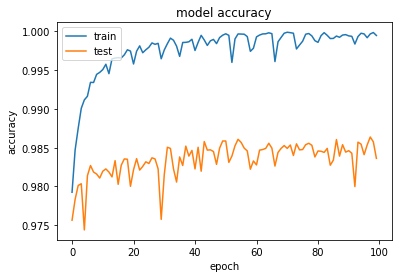

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

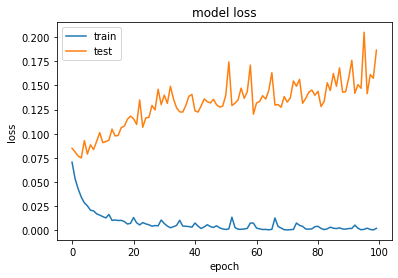

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict([X_test_inter,X_test_cont])
X_test['combined_predictions'] = y_pred.argmax(axis=1)

In [ ]:
f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')

0.5982508107135626

In [ ]:
accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

0.9836198031438226

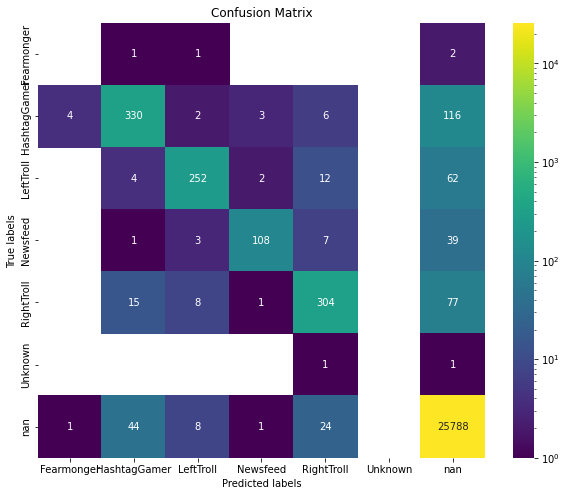

In [ ]:

conf_mat = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize=(10,8))
colors = cm.get_cmap('viridis',25862)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax, norm=LogNorm(), cmap=colors);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fearmonger', 'HashtagGamer','LeftTroll', 'Newsfeed', 'RightTroll', 'Unknown','nan']); ax.yaxis.set_ticklabels(['Fearmonger', 'HashtagGamer','LeftTroll', 'Newsfeed', 'RightTroll', 'Unknown','nan']);

In [ ]:
X_test

,user_id,troll_label,number_of_communications,user_label,i_emb_1,i_emb_2,i_emb_3,i_emb_4,i_emb_5,i_emb_6,...,c_emb_377,c_emb_378,c_emb_379,c_emb_380,c_emb_381,c_emb_382,c_emb_383,interactions_predictions,content_predictions,combined_predictions
46868,4055906223,RightTroll,3,NaN,0.462099,-0.188525,0.292322,0.603037,-0.732258,0.046217,...,-0.057479,-0.106457,-0.133397,0.069177,0.283184,0.188373,0.026228,6,6,6
55581,19318314,LeftTroll,1,NaN,-0.233147,0.455398,1.826569,0.644797,-0.532009,0.470667,...,0.050329,-0.017465,0.066769,0.316101,-0.384427,-0.133672,-0.150220,6,4,6
5832,91704353,HashtagGamer,1,NaN,0.379801,0.279609,-0.145845,-0.304889,-0.284067,-0.293927,...,-0.073708,-0.285252,0.265858,0.225400,-0.308415,0.081859,0.263814,6,6,6
41393,141457038,RightTroll,1,NaN,0.459218,-0.192166,0.292625,0.606528,-0.739536,0.047042,...,0.134628,-0.541072,0.071889,-0.112296,0.236368,0.833883,-0.326172,6,6,6
6568,322879013,RightTroll,1,NaN,0.768351,0.328922,0.696026,0.378153,-0.550009,-0.137332,...,0.255650,-0.005507,0.289792,0.632154,-0.141409,0.076882,-0.289222,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60425,917073918,LeftTroll,1,NaN,0.239006,0.103315,0.928216,-0.767358,-0.850159,-0.376851,...,0.092393,-0.049249,0.041458,0.271642,-0.137361,0.211627,-0.151548,6,6,6
59479,2800938060,LeftTroll,1,NaN,0.252691,0.114976,0.942480,-0.762519,-0.866137,-0.382499,...,-0.046598,-0.515969,-0.177148,-0.443053,0.194253,0.061947,0.188521,6,6,6
28021,31681323,LeftTroll,1,NaN,0.431352,0.437051,1.485786,0.703498,0.375742,0.489352,...,0.517116,-0.285858,0.223644,0.785833,-0.320385,-0.243100,-0.180925,6,6,6
1005,503472339,LeftTroll,1,NaN,-0.311583,-0.134692,1.692104,0.769226,-0.596073,0.356160,...,0.124512,0.403602,-0.025936,0.393043,-0.295505,-0.152714,0.332433,6,6,6


In [ ]:
labels = ['Fearmonger', 'HashtagGamer','LeftTroll', 'Newsfeed', 'RightTroll', 'Unknown','nan']
X_test['interactions_predictions'] = X_test['interactions_predictions'].apply(lambda x: labels[x])

In [ ]:
X_test['content_predictions'] = X_test['content_predictions'].apply(lambda x: labels[x])
X_test['combined_predictions'] = X_test['combined_predictions'].apply(lambda x: labels[x])

In [ ]:
X_test

,user_id,troll_label,number_of_communications,user_label,i_emb_1,i_emb_2,i_emb_3,i_emb_4,i_emb_5,i_emb_6,...,c_emb_377,c_emb_378,c_emb_379,c_emb_380,c_emb_381,c_emb_382,c_emb_383,interactions_predictions,content_predictions,combined_predictions
46868,4055906223,RightTroll,3,NaN,0.462099,-0.188525,0.292322,0.603037,-0.732258,0.046217,...,-0.057479,-0.106457,-0.133397,0.069177,0.283184,0.188373,0.026228,nan,nan,nan
55581,19318314,LeftTroll,1,NaN,-0.233147,0.455398,1.826569,0.644797,-0.532009,0.470667,...,0.050329,-0.017465,0.066769,0.316101,-0.384427,-0.133672,-0.150220,nan,RightTroll,nan
5832,91704353,HashtagGamer,1,NaN,0.379801,0.279609,-0.145845,-0.304889,-0.284067,-0.293927,...,-0.073708,-0.285252,0.265858,0.225400,-0.308415,0.081859,0.263814,nan,nan,nan
41393,141457038,RightTroll,1,NaN,0.459218,-0.192166,0.292625,0.606528,-0.739536,0.047042,...,0.134628,-0.541072,0.071889,-0.112296,0.236368,0.833883,-0.326172,nan,nan,nan
6568,322879013,RightTroll,1,NaN,0.768351,0.328922,0.696026,0.378153,-0.550009,-0.137332,...,0.255650,-0.005507,0.289792,0.632154,-0.141409,0.076882,-0.289222,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60425,917073918,LeftTroll,1,NaN,0.239006,0.103315,0.928216,-0.767358,-0.850159,-0.376851,...,0.092393,-0.049249,0.041458,0.271642,-0.137361,0.211627,-0.151548,nan,nan,nan
59479,2800938060,LeftTroll,1,NaN,0.252691,0.114976,0.942480,-0.762519,-0.866137,-0.382499,...,-0.046598,-0.515969,-0.177148,-0.443053,0.194253,0.061947,0.188521,nan,nan,nan
28021,31681323,LeftTroll,1,NaN,0.431352,0.437051,1.485786,0.703498,0.375742,0.489352,...,0.517116,-0.285858,0.223644,0.785833,-0.320385,-0.243100,-0.180925,nan,nan,nan
1005,503472339,LeftTroll,1,NaN,-0.311583,-0.134692,1.692104,0.769226,-0.596073,0.356160,...,0.124512,0.403602,-0.025936,0.393043,-0.295505,-0.152714,0.332433,nan,nan,nan


In [ ]:
X_test.to_csv(os.path.join(path_to_data_dir, 'model_res.csv'))

In [ ]:
X_test

,user_id,troll_label,number_of_communications,user_label,i_emb_1,i_emb_2,i_emb_3,i_emb_4,i_emb_5,i_emb_6,...,c_emb_377,c_emb_378,c_emb_379,c_emb_380,c_emb_381,c_emb_382,c_emb_383,interactions_predictions,content_predictions,combined_predictions
46868,4055906223,RightTroll,3,NaN,0.462099,-0.188525,0.292322,0.603037,-0.732258,0.046217,...,-0.057479,-0.106457,-0.133397,0.069177,0.283184,0.188373,0.026228,nan,nan,nan
55581,19318314,LeftTroll,1,NaN,-0.233147,0.455398,1.826569,0.644797,-0.532009,0.470667,...,0.050329,-0.017465,0.066769,0.316101,-0.384427,-0.133672,-0.150220,nan,RightTroll,nan
5832,91704353,HashtagGamer,1,NaN,0.379801,0.279609,-0.145845,-0.304889,-0.284067,-0.293927,...,-0.073708,-0.285252,0.265858,0.225400,-0.308415,0.081859,0.263814,nan,nan,nan
41393,141457038,RightTroll,1,NaN,0.459218,-0.192166,0.292625,0.606528,-0.739536,0.047042,...,0.134628,-0.541072,0.071889,-0.112296,0.236368,0.833883,-0.326172,nan,nan,nan
6568,322879013,RightTroll,1,NaN,0.768351,0.328922,0.696026,0.378153,-0.550009,-0.137332,...,0.255650,-0.005507,0.289792,0.632154,-0.141409,0.076882,-0.289222,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60425,917073918,LeftTroll,1,NaN,0.239006,0.103315,0.928216,-0.767358,-0.850159,-0.376851,...,0.092393,-0.049249,0.041458,0.271642,-0.137361,0.211627,-0.151548,nan,nan,nan
59479,2800938060,LeftTroll,1,NaN,0.252691,0.114976,0.942480,-0.762519,-0.866137,-0.382499,...,-0.046598,-0.515969,-0.177148,-0.443053,0.194253,0.061947,0.188521,nan,nan,nan
28021,31681323,LeftTroll,1,NaN,0.431352,0.437051,1.485786,0.703498,0.375742,0.489352,...,0.517116,-0.285858,0.223644,0.785833,-0.320385,-0.243100,-0.180925,nan,nan,nan
1005,503472339,LeftTroll,1,NaN,-0.311583,-0.134692,1.692104,0.769226,-0.596073,0.356160,...,0.124512,0.403602,-0.025936,0.393043,-0.295505,-0.152714,0.332433,nan,nan,nan


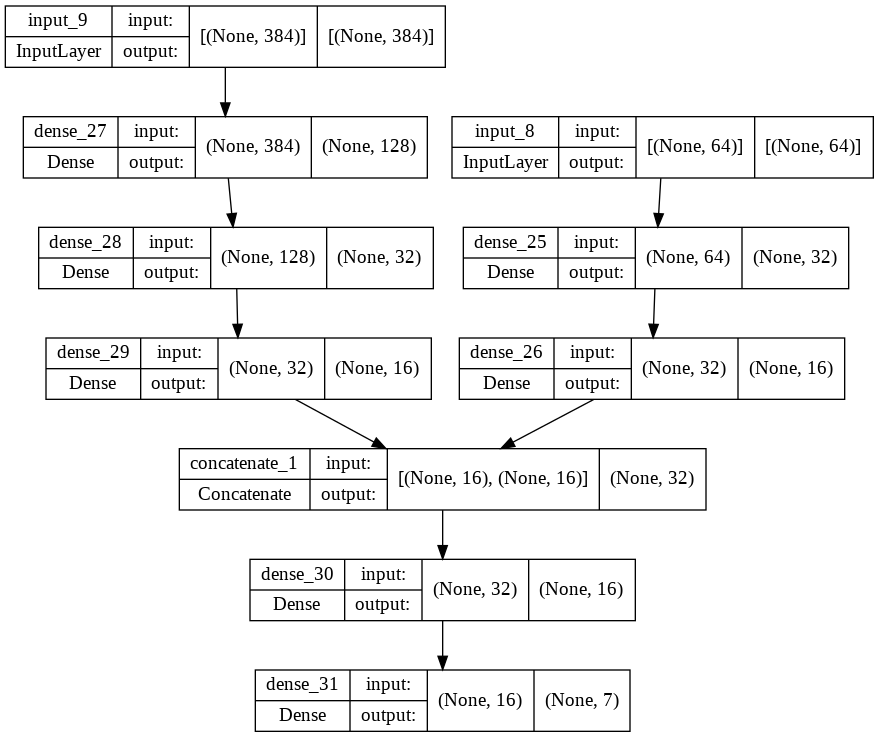

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)